Olá, Neyllor!

Meu nome é Ramon e te ajudarei neste projeto. Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>



<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


# O que vende um carro?

Esta analise busca definir os principais fatores que influenciam no preço dos veículos anunciados. Para isso foi tido como base os dados referentes a centenas de anúncios publicados nos ultimos anos nas Lista de Eixo de Manivela. 

## Iniciação

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
from datetime import date

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Carregue dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df_veiculos = pd.read_csv('/datasets/vehicles_us.csv')
df_veiculos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price` - O valor do veículo.
- `model_year`- O ano de modelo do veículo.
- `model`- O nome do modelo.
- `condition`- A condição que varia em 5 niveis.
- `cylinders` - Quantidade de cilindros no motor.
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada.
- `transmission`- automatico ou manual.
- `paint_color`- A cor do veículo. 
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano).
- `date_posted` — a data que a propaganda foi publicada.
- `days_listed` — dias desde a publicação até a retirada.


In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame
df_veiculos.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [4]:
# imprima uma amostragem dos dados
df_veiculos.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Alguns veículos estão com o preço muito baixo, carros com ano de fabricação muito antigos e alguns carros possuem o odometro muito alto. Estas colunas serão analisadas com mais atenção logo a frente.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [5]:
df_veiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [6]:
df_veiculos['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Conclusões e próximos passos

Analisando os tipos dos dados vemos que algumas colunas não possuem o tipo mais aproriado. 
Ex. model_year, cylinders do tipo float no lugar de int64 e is_4wd ser do tipo float no lugar de boolean.

Além disto observamos valores ausentes nas colunas model_year, cylinders, odometer, paint_color e is_4wd. 
Sendo as colunas is_4wd, pain_color e odometer, nessa ordem, as que possuem mais valores faltantes.

Ainda na coluna is_4wd observamos que os veiculos que possuem tração 4x4 possuem o valor "1.0" e os que não possuem estão sem nenhum valor na coluna. Estes valores ausentes serão prenchidos e convertidos em valores do tipo Boolean.

A coluna transmission apresenta o item "other", como é dificil especificar que tipo de transmissão é esta, o dados que apresentam a mesma serão removidos.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Cuide dos valores ausentes (se houver algum)

In [7]:
#Transformando e preenchendo a coluna "is_4wd"
df_veiculos['is_4wd'] = df_veiculos['is_4wd'].where(df_veiculos['is_4wd'] == 1.0, False)
df_veiculos['is_4wd'] = df_veiculos['is_4wd'].where(df_veiculos['is_4wd'] != 1.0, True)
df_veiculos.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. você pode usar indexação lógica em vez de .where
</div>

Conforme descrito anteriormente, a coluna is_4wd foi alterada para que apresentasse os valores True e False.

In [8]:
#Obter quantidades de linhas com dados faltantes na coluna 'model_year'
df_veiculos_filter = df_veiculos.loc[(df_veiculos['model_year'].isna())]
len(df_veiculos_filter)

3619

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observamos que existem 3.619 linhas com dados ausentes na coluna "model_year", isto corresponde a aproximadamente 7% de todas as linhas de dados do Dataset. Levando em consideranção a importância deste dado para definição dos valores dos automoveis e o baixo percentual de dados faltantes, optou-se por retirar estas linhas do dataset para que se possa trabalhar com valores mais próximos da realiadade.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Porém, 7% é uma porcentagem razoável. O ideal é imputar.
</div>

In [9]:
#Remover linhas com dados faltantes na coluna 'model_year' do dataset.
df_veiculos_filter = df_veiculos[pd.notnull(df_veiculos['model_year'])]
df_veiculos_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47906 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         47906 non-null  object 
 3   condition     47906 non-null  object 
 4   cylinders     43009 non-null  float64
 5   fuel          47906 non-null  object 
 6   odometer      40563 non-null  float64
 7   transmission  47906 non-null  object 
 8   type          47906 non-null  object 
 9   paint_color   39291 non-null  object 
 10  is_4wd        47906 non-null  object 
 11  date_posted   47906 non-null  object 
 12  days_listed   47906 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Porém, vocẽ pode usar indexação lógica.
</div>

In [10]:
#obentendo valores médios de cylindros por modelos e anos de carros
veiculos_filter_pivot = df_veiculos_filter.pivot_table(index = ['model_year', 'model'], values = 'cylinders', aggfunc = 'median')
veiculos_filter_pivot

cylinders
model_year model                       
1908.0     cadillac escalade        8.0
           gmc yukon                8.0
1929.0     ford f-150               8.0
1936.0     ford f-150               6.0
1948.0     chevrolet impala         8.0
...                                 ...
2019.0     toyota highlander        6.0
           toyota rav4              4.0
           toyota sienna            6.0
           toyota tacoma            6.0
           volkswagen jetta         4.0

[2202 rows x 1 columns]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [11]:
#Função para preencher valores ausentes em "cylinders"
def fill_cylinders(row):
    if pd.isna(row['cylinders']):
        try:
            return veiculos_filter_pivot['cylinders'][row['model_year']][row['model']]
        except:
            return 0
    return row['cylinders']

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [12]:
df_veiculos_filter['cylinders'] = df_veiculos_filter.apply(fill_cylinders, axis=1)
df_veiculos_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47906 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         47906 non-null  object 
 3   condition     47906 non-null  object 
 4   cylinders     47906 non-null  float64
 5   fuel          47906 non-null  object 
 6   odometer      40563 non-null  float64
 7   transmission  47906 non-null  object 
 8   type          47906 non-null  object 
 9   paint_color   39291 non-null  object 
 10  is_4wd        47906 non-null  object 
 11  date_posted   47906 non-null  object 
 12  days_listed   47906 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


/tmp/ipykernel_100/3712672211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_veiculos_filter['cylinders'] = df_veiculos_filter.apply(fill_cylinders, axis=1)


As linhas com os dados de cilindros faltantes foram preenchidas com base em dados de outras linhas que possuissem o mesmo modelo de veículo produzido no mesmo ano. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [13]:
veiculos_filter_pivot = df_veiculos_filter.pivot_table(index = ['model_year'], values = 'odometer', aggfunc = 'mean')
veiculos_filter_pivot

,odometer
model_year,
1908.0,169328.000000
1936.0,30000.000000
1948.0,4000.000000
1949.0,1800.000000
1954.0,3565.000000
...,...
2015.0,82501.745817
2016.0,61455.480876
2017.0,47557.926471


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [14]:
#Função para obter o odometro médio do veículo
def fill_odometer(row):
    if pd.isna(row['odometer']):
        try:
            return veiculos_filter_pivot['odometer'][row['model_year']]
        except:
            return 0
    return row['odometer']

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [15]:
df_veiculos_filter['odometer'] = df_veiculos_filter.apply(fill_odometer, axis=1)
df_veiculos_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47906 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         47906 non-null  object 
 3   condition     47906 non-null  object 
 4   cylinders     47906 non-null  float64
 5   fuel          47906 non-null  object 
 6   odometer      47906 non-null  float64
 7   transmission  47906 non-null  object 
 8   type          47906 non-null  object 
 9   paint_color   39291 non-null  object 
 10  is_4wd        47906 non-null  object 
 11  date_posted   47906 non-null  object 
 12  days_listed   47906 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


/tmp/ipykernel_100/528209277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_veiculos_filter['odometer'] = df_veiculos_filter.apply(fill_odometer, axis=1)


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

As linhas com dados do odometro faltante foram preenchidas tendo como base a média de quilomentros percorridos pelos carros com a mesma idade. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [16]:
#Verificando se existem duplicatas
df_veiculos_filter.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,True,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.000000,automatic,sedan,white,False,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.000000,automatic,SUV,black,True,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.000000,automatic,SUV,NaN,True,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.000000,automatic,SUV,blue,True,2019-02-15,17
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.000000,automatic,pickup,black,True,2018-09-17,38


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [17]:
df_veiculos_filter.duplicated().sum()

0

Após realizar estas modificações no dataset observamos que ainda restam dados faltantes na coluna 'paint_color'. As mesmas serão tratadas mais a frente. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Corrija os tipos de dados

In [18]:
df_veiculos_filter['price'] = df_veiculos_filter['price'].astype(float)
df_veiculos_filter['model_year'] = df_veiculos_filter['model_year'].astype(int)
df_veiculos_filter['cylinders'] = df_veiculos_filter['cylinders'].astype(int)
df_veiculos_filter['date_posted'] = pd.to_datetime(df_veiculos_filter['date_posted'], format='%Y-%m-%d')
df_veiculos_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47906 non-null  float64       
 1   model_year    47906 non-null  int64         
 2   model         47906 non-null  object        
 3   condition     47906 non-null  object        
 4   cylinders     47906 non-null  int64         
 5   fuel          47906 non-null  object        
 6   odometer      47906 non-null  float64       
 7   transmission  47906 non-null  object        
 8   type          47906 non-null  object        
 9   paint_color   39291 non-null  object        
 10  is_4wd        47906 non-null  object        
 11  date_posted   47906 non-null  datetime64[ns]
 12  days_listed   47906 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 5.1+ MB


/tmp/ipykernel_100/2413674795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_veiculos_filter['price'] = df_veiculos_filter['price'].astype(float)
/tmp/ipykernel_100/2413674795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_veiculos_filter['model_year'] = df_veiculos_filter['model_year'].astype(int)
/tmp/ipykernel_100/2413674795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [19]:
df_veiculos_filter.groupby('transmission')['transmission'].count()

transmission
automatic    43592
manual        2642
other         1672
Name: transmission, dtype: int64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Porém, você pode usar o método value_counts()
</div>

In [20]:
df_veiculos_filter = df_veiculos_filter[df_veiculos_filter['transmission'] != 'other']
df_veiculos_filter['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Enriqueça os dados

In [21]:
# Adicione valores data/hora para quando a propaganda estiver colocada


In [22]:
# Adicione a idade do veículo quando a propaganda for colocada
df_veiculos_filter['age'] = pd.DatetimeIndex(df_veiculos_filter['date_posted']).year - df_veiculos_filter['model_year']
df_veiculos_filter.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age
0,9400.0,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,NaN,True,2018-06-23,19,7
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,6
3,1500.0,2003,ford f-150,fair,8,gas,162071.751024,automatic,pickup,NaN,False,2019-03-22,9,16
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2
5,14990.0,2014,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,4


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [23]:
#Obter quilometragem odometro médio com relação a idade do veículo
df_veiculos_filter['km_media'] = df_veiculos_filter['odometer'] / df_veiculos_filter['age']
df_veiculos_filter.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,km_media
0,9400.0,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,NaN,True,2018-06-23,19,7,20714.285714
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,6,18333.333333
3,1500.0,2003,ford f-150,fair,8,gas,162071.751024,automatic,pickup,NaN,False,2019-03-22,9,16,10129.484439
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,40451.500000
5,14990.0,2014,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,4,14488.500000


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [24]:
#Obter quilometragem odometro médio por ano
#????

In [25]:
df_veiculos_filter['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [26]:
#Função para categorizar a condição dos veiculos 
def categoriza_condition(row):
    if(row['condition'] == 'new'):
        return 5
    elif (row['condition'] == 'like new'):
        return 4
    elif (row['condition'] == 'excellent'):
        return 3
    elif (row['condition'] == 'good'):
        return 2
    elif (row['condition'] == 'fair'):
        return 1
    else: 
        return 0

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [27]:
df_veiculos_filter['condition'] = df_veiculos_filter.apply(categoriza_condition, axis=1)
df_veiculos_filter.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,km_media
0,9400.0,2011,bmw x5,2,6,gas,145000.000000,automatic,SUV,NaN,True,2018-06-23,19,7,20714.285714
2,5500.0,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,6,18333.333333
3,1500.0,2003,ford f-150,1,8,gas,162071.751024,automatic,pickup,NaN,False,2019-03-22,9,16,10129.484439
4,14900.0,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,40451.500000
5,14990.0,2014,chrysler 300,3,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,4,14488.500000
6,12990.0,2015,toyota camry,3,4,gas,79212.000000,automatic,sedan,white,False,2018-12-27,73,3,26404.000000
7,15990.0,2013,honda pilot,3,6,gas,109473.000000,automatic,SUV,black,True,2019-01-07,68,6,18245.500000
8,11500.0,2012,kia sorento,3,4,gas,104174.000000,automatic,SUV,NaN,True,2018-07-16,19,6,17362.333333
9,9200.0,2008,honda pilot,3,6,gas,147191.000000,automatic,SUV,blue,True,2019-02-15,17,11,13381.000000
10,19500.0,2011,chevrolet silverado 1500,3,8,gas,128413.000000,automatic,pickup,black,True,2018-09-17,38,7,18344.714286


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Verifique os dados limpos

In [28]:
# imprima as informações gerais/resumidas sobre o DataFrameA value is trying to be set on a copy of a slice from a DataFrame.
df_veiculos_filter.describe()


,price,model_year,condition,cylinders,odometer,days_listed,age,km_media
count,46234.000000,46234.000000,46234.000000,46234.000000,46234.000000,46234.000000,46234.000000,4.623200e+04
mean,11961.457542,2009.570013,2.651880,6.087749,117627.930144,39.608210,8.737098,inf
std,10022.436072,6.267503,0.714978,1.652945,61482.182680,28.230353,6.281157,NaN
min,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,4999.000000,2006.000000,2.000000,4.000000,77000.000000,19.000000,4.000000,1.107143e+04
50%,8995.000000,2011.000000,3.000000,6.000000,117000.000000,33.000000,8.000000,1.548181e+04
75%,15995.000000,2014.000000,3.000000,8.000000,153322.000000,53.000000,12.000000,2.228571e+04
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,110.000000,inf


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Veja que há inf em km_media. 
</div>

In [29]:
# imprima uma amostragem dos dados
df_veiculos_filter.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,km_media
0,9400.0,2011,bmw x5,2,6,gas,145000.000000,automatic,SUV,NaN,True,2018-06-23,19,7,20714.285714
2,5500.0,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,6,18333.333333
3,1500.0,2003,ford f-150,1,8,gas,162071.751024,automatic,pickup,NaN,False,2019-03-22,9,16,10129.484439
4,14900.0,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,40451.500000
5,14990.0,2014,chrysler 300,3,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,4,14488.500000
6,12990.0,2015,toyota camry,3,4,gas,79212.000000,automatic,sedan,white,False,2018-12-27,73,3,26404.000000
7,15990.0,2013,honda pilot,3,6,gas,109473.000000,automatic,SUV,black,True,2019-01-07,68,6,18245.500000
8,11500.0,2012,kia sorento,3,4,gas,104174.000000,automatic,SUV,NaN,True,2018-07-16,19,6,17362.333333
9,9200.0,2008,honda pilot,3,6,gas,147191.000000,automatic,SUV,blue,True,2019-02-15,17,11,13381.000000
10,19500.0,2011,chevrolet silverado 1500,3,8,gas,128413.000000,automatic,pickup,black,True,2018-09-17,38,7,18344.714286


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Estude os parâmetros fundamentais

[Escolha uma abordagem apropriada para estudar os parâmetros listados abaixo, preste atenção especial a como os valores atípicos afetam a forma e a legibilidade dos histogramas.]

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

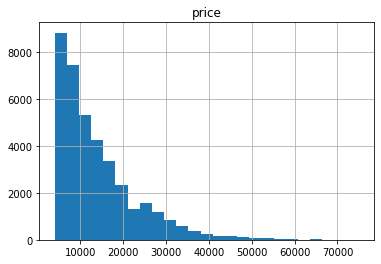

In [30]:
#Histograma referente aos preços
df_veiculos_filter.hist('price', bins = 25, range = (4000, 75000))


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

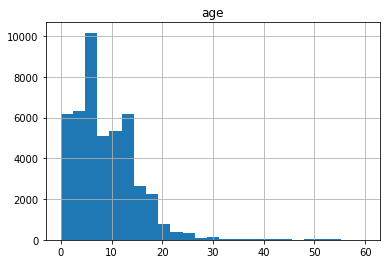

In [31]:
#Histograma referte as idades dos veículos

df_veiculos_filter.hist('age', bins = 25, range = (0, 60))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:title={'center':'km_media'}>]], dtype=object)

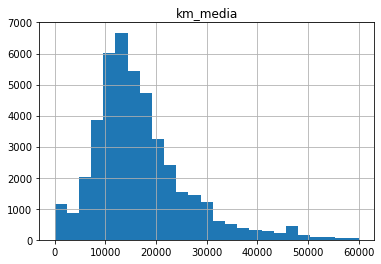

In [32]:
# Histograma referente a quilometragem média dos veículos

df_veiculos_filter.hist('km_media', bins = 25, range = (0, 60000))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

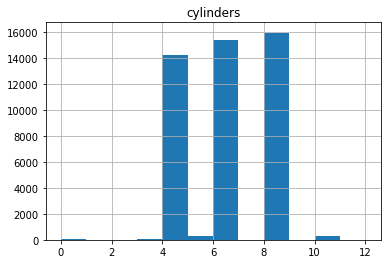

In [33]:
# Histograma referente ao número de cilindro dos veículos

df_veiculos_filter.hist('cylinders', bins = 12, range = (0,12))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

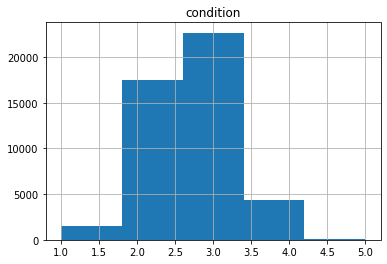

In [34]:
# Histograma referente a condição dos veículos

df_veiculos_filter.hist('condition', bins = 5, range = (1 , 5))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Estude e cuide dos valores ausentes

Nos gráficos acima observa-se que algumas colunas possuem valores atipicos. Exemplos:
- Veiculos com uma km_media anual extremamente alta
- Veiculos com preços muito baixos 
- Veiculos com idade muita alta

Estes itens serão tratados nas linhas abaixo.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [35]:
# Determine o limite inferior para valores atípicos
df_veiculos_final = df_veiculos_filter.query('cylinders >= 4 and price > 2500')
df_veiculos_final.describe()

,price,model_year,condition,cylinders,odometer,days_listed,age,km_media
count,42777.000000,42777.000000,42777.000000,42777.000000,42777.000000,42777.000000,42777.000000,4.277500e+04
mean,12801.503892,2009.920588,2.689646,6.121280,115513.619335,39.634196,8.386493,inf
std,9936.542432,6.009443,0.682747,1.645567,59604.565987,28.271791,6.022500,NaN
min,2550.000000,1908.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5950.000000,2007.000000,2.000000,4.000000,76233.000000,19.000000,4.000000,1.134803e+04
50%,9950.000000,2011.000000,3.000000,6.000000,113938.000000,33.000000,7.000000,1.575000e+04
75%,16950.000000,2014.000000,3.000000,8.000000,151854.205637,53.000000,12.000000,2.267500e+04
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,110.000000,inf


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Pode usar indexação lógica.
</div>

In [36]:
# Determine o limite superior para valores atípicos
df_veiculos_final = df_veiculos_final.query('cylinders <= 10 and price < 60000 and age <= 25 and km_media <= 40000')
df_veiculos_final.describe()

,price,model_year,condition,cylinders,odometer,days_listed,age,km_media
count,38694.000000,38694.000000,38694.000000,38694.000000,38694.000000,38694.000000,38694.000000,38694.000000
mean,11693.482116,2009.641831,2.663488,6.106502,119649.960125,39.671163,8.679408,16233.433820
std,8097.376868,4.789954,0.667643,1.634170,56026.711836,28.309254,4.784796,7541.395792
min,2550.000000,1993.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000
25%,5650.000000,2007.000000,2.000000,4.000000,82501.745817,19.000000,5.000000,11090.909091
50%,8999.000000,2010.000000,3.000000,6.000000,118948.000000,33.000000,8.000000,15018.571429
75%,15500.000000,2013.000000,3.000000,8.000000,152000.000000,53.000000,12.000000,20494.312500
max,59988.000000,2018.000000,5.000000,10.000000,920000.000000,271.000000,25.000000,40000.000000


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Pode usar indexação lógica.
</div>

## Estude os parâmetros fundamentais sem valores atípicos

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

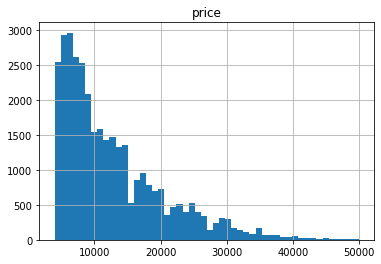

In [37]:
df_veiculos_final.hist('price', bins = 50, range = (4000, 50000))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

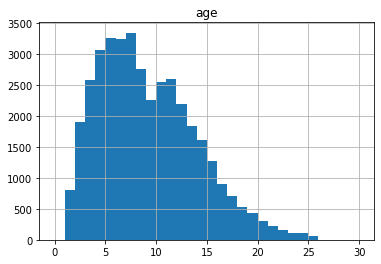

In [38]:
df_veiculos_final.hist('age', bins = 30, range = (0, 30))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:title={'center':'km_media'}>]], dtype=object)

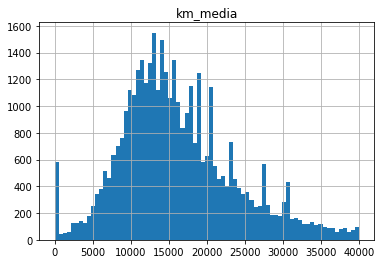

In [39]:
df_veiculos_final.hist('km_media', bins = 75, range = (0, 40000))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

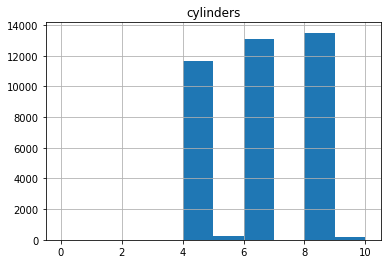

In [40]:
df_veiculos_final.hist('cylinders', bins = 10, range = (0,10))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

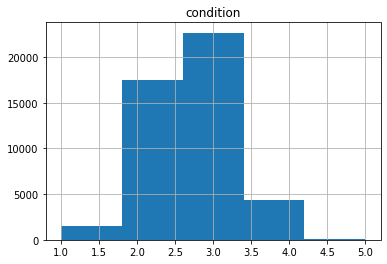

In [41]:
df_veiculos_filter.hist('condition', bins = 5, range = (1 , 5))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Tempo de vida das propagandas

[Estude quantos dias propagandas foram exibidas (`days_listed`). Calcule a média e a mediana. Descreva o tempo de vida útil comum de uma propaganda. Determine quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.]

In [42]:
print('média: ', np.mean(df_veiculos_final['days_listed']))
print('mediana: ', np.median(df_veiculos_final['days_listed']))

média:  39.671163487879255
mediana:  33.0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [43]:
df_veiculos_final['days_listed'].describe()

count    38694.000000
mean        39.671163
std         28.309254
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observa-se que o tempo medio que uma propaganda é de aproximadamente 40 dias, e que a mediana é de 33 dias, sendo o pico de vida das mesmas entre aproximadamente 15 e 35 dias. Tendo isto como base, as propagandas com menos de 2 dias ou mais de 120 dias, serão removidas do Dataset.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [44]:
df_veiculos_final = df_veiculos_final.query('days_listed >= 2 and days_listed <= 120')
df_veiculos_final.describe()

,price,model_year,condition,cylinders,odometer,days_listed,age,km_media
count,37904.000000,37904.000000,37904.000000,37904.000000,37904.000000,37904.000000,37904.000000,37904.000000
mean,11705.964648,2009.646238,2.663439,6.107113,119571.656800,38.104052,8.674546,16231.623580
std,8109.424328,4.790785,0.667887,1.633966,56034.975161,24.822212,4.785462,7543.830623
min,2550.000000,1993.000000,0.000000,4.000000,0.000000,2.000000,1.000000,0.000000
25%,5670.000000,2007.000000,2.000000,4.000000,82501.745817,19.000000,5.000000,11090.909091
50%,8999.000000,2010.000000,3.000000,6.000000,118830.500000,33.000000,8.000000,15000.500000
75%,15500.000000,2013.000000,3.000000,8.000000,152000.000000,52.000000,12.000000,20494.916667
max,59988.000000,2018.000000,5.000000,10.000000,920000.000000,120.000000,25.000000,40000.000000


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

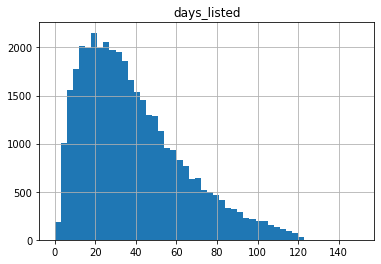

In [45]:
df_veiculos_final.hist('days_listed', bins = 50, range = (0 , 150))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Média de preços por cada tipo de veículo

In [46]:
type_filter = df_veiculos_final.pivot_table(index = 'type', values = 'price', aggfunc = ['mean','count'])
type_filter = type_filter.sort_values(by = ('count', 'price'), ascending = False)
type_filter

,mean,count
,price,price
type,,
SUV,10984.773947,9427
truck,15975.877425,9382
sedan,7221.291536,8956
pickup,14913.105870,4940
wagon,9198.299919,1227
coupe,12094.356960,1171
mini-van,8081.043478,874
hatchback,6924.854033,781


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='type'>

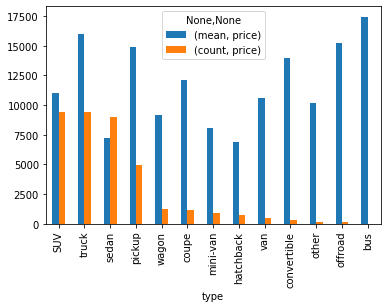

In [47]:
type_filter.plot(kind='bar')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observa-se que os tipos de carros com mais propagandas são os SUVs seguidos pelos Trucks e os Sedans. Quanto aos preços médios observa-se que os Onibus possuem os valores mais altos, apesar de só possuir 23 anuncios destes veículos, seguidos pelos trucks, offroads e pickups.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Fatores de preço

In [48]:
# Analise dos preços quanto a cor dos veiculos
df_veiculos_filter_color = df_veiculos_final.pivot_table(index = 'paint_color', values = 'price', aggfunc= ['median', 'count'])
df_veiculos_filter_color.sort_values(by=('median', 'price'), ascending = False)

,median,count
,price,price
paint_color,,
orange,13900.0,145
yellow,11500.0,129
white,10988.0,7264
black,10500.0,5623
red,8750.0,3243
custom,8500.0,849
grey,8499.0,3828
silver,8001.0,4727


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='paint_color'>

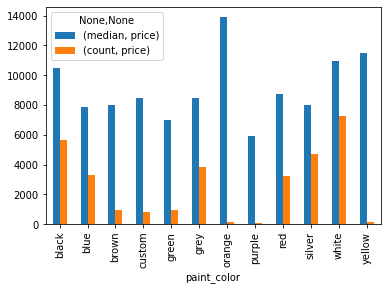

In [49]:
df_veiculos_filter_color.plot(kind='bar')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='transmission'>

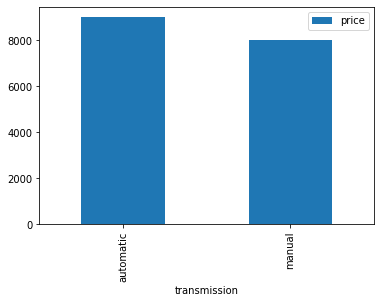

In [50]:
# Analise dos preços quanto ao tipo de transmissão dos veiculos
df_veiculos_filter_transmission = df_veiculos_final.pivot_table(index = 'transmission', values = 'price', aggfunc='median')
df_veiculos_filter_transmission.plot(kind = 'bar')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [51]:
# Analise dos preços quanto a condição dos veiculos
df_veiculos_filter_condition = df_veiculos_final.pivot_table(index = 'condition', values = 'price', aggfunc=['median', 'count'])
df_veiculos_filter_condition.sort_values(by= ('median', 'price'), ascending = False)

,median,count
,price,price
condition,,
4,12500.0,3323
3,10470.0,19090
5,8300.0,45
2,7500.0,14762
0,5350.0,40
1,4200.0,644


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='condition'>

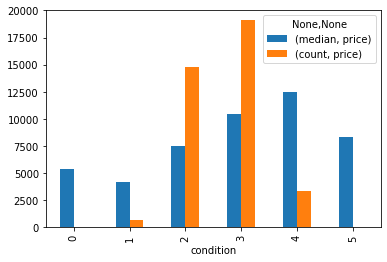

In [53]:
df_veiculos_filter_condition.plot(kind = 'bar')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:xlabel="('median', 'price')", ylabel="('median', 'price')">,
        <AxesSubplot:xlabel="('count', 'price')", ylabel="('median', 'price')">],
       [<AxesSubplot:xlabel="('median', 'price')", ylabel="('count', 'price')">,
        <AxesSubplot:xlabel="('count', 'price')", ylabel="('count', 'price')">]],
      dtype=object)

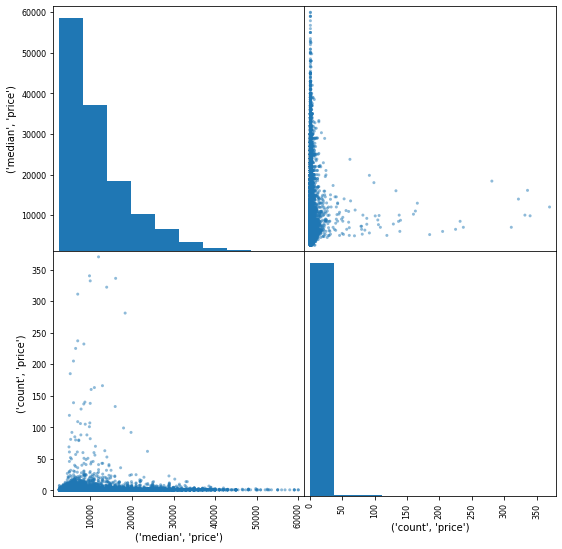

In [54]:
# Analise dos preços quanto a quilometrageme média dos veiculos
df_veiculos_filter_km_media = df_veiculos_final.pivot_table(index = 'km_media', values = 'price', aggfunc=['median', 'count'])
pd.plotting.scatter_matrix(df_veiculos_filter_km_media, figsize=(9,9))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

array([[<AxesSubplot:xlabel="('median', 'price')", ylabel="('median', 'price')">,
        <AxesSubplot:xlabel="('count', 'price')", ylabel="('median', 'price')">],
       [<AxesSubplot:xlabel="('median', 'price')", ylabel="('count', 'price')">,
        <AxesSubplot:xlabel="('count', 'price')", ylabel="('count', 'price')">]],
      dtype=object)

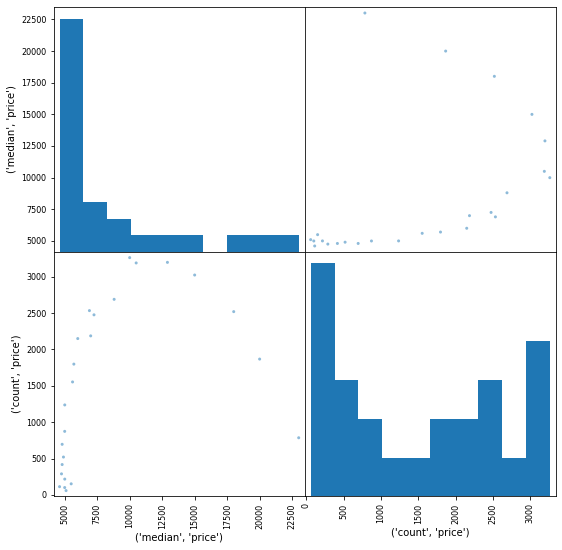

In [55]:
# Analise dos preços quanto a idade dos veiculos
df_veiculos_filter_age = df_veiculos_final.pivot_table(index = 'age', values = 'price', aggfunc=['median', 'count'])
pd.plotting.scatter_matrix(df_veiculos_filter_age, figsize=(9,9))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Conclusão geral

Ao final do estudo dos dados foi possivel obter as seguintes conclusões:

1 - O tempo médio de uma propaganda é de 39 dias, sendo que a maioria ficam publicadas entre 15 e 40 dias. 

2 - Os tipos de veículos com mais anuncios são os SUVs, caminhões e sedans e os com menos anuncios são os ônibus, offroads ou outro tipo não declarado.

3 - Quanto ao valor médio, os ônibus possuem o maior valor, $ 17.445,91, só que só existem 23 anúncios deste tipo de veículo.

4 - Entre os veículos com maiores números de anúcios, os caminhões possuem o maior valor médio, seguidos dos offroads, pickups e coupes

Quanto aos fatores de preço:

1 - Quanto a cor, observa-se que as cores cujos anúncios possuem valor médio mais alto são laranja, amarelo, branco e preto, nesta ordem. E as com valor médio mais baixo são roxo, verde, azul e marrom.

2 - Quanto ao tipo de transmissão, observa-se que os veículos automaticos possuem um valor médio maior dos que os com transmissão manual.

3- Quanto a condição, os veículos em codição de "como novo" possuem o maior valor médio, e os veículos "razoáveis" o menor valor médio. É preciso observa que existem poucos anuncios com veículos em condição de "novo" (45) e sucata (40), por este motivos não a dados suficientes para uma analise destas categorias.

4 - Quanto a quilometragem, observa-se que quanto maior for menor será o valor do veículo.

5 - Quanto a idade, também observa-se que quanto maior for menor será o valor do veículo.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Conclusões excelentes. Parabéns!
</div>

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho e fez uma análise correta. Você demonstra segurança e saber programar bem. A única sugestão que tenho é quato a evitar o uso de funçãoes quando puder usar indexação lógica pois esta é mais eficiente.

Desejo sucesso em sua jornada.
</div>